# Chicago Divvy Bike Sharing data
Data from https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data

Setup using:

```
conda install -c plotly plotly=5.3.1
conda install -c conda-forge python-dotenv
```

In [29]:
# Imports
import dask.dataframe as dd
from dask.distributed import Client, progress
import plotly.express as px
#import pyodbc
#import pandas as pd

from dotenv import load_dotenv
import os
_ = load_dotenv()

In [28]:
#con = pyodbc.connect("Driver={{SQL Server Native Client 11.0}};Server={};Database=ChicagoBikeData;Trusted_Connection=yes;".format(os.getenv('SQLSERVER')))
#cursor = con.cursor()
#cursor.execute("SELECT 1 as num UNION SELECT 2 as num")
#for row in cursor:
#    print(row[0])
#d = pd.read_sql_query('SELECT 1 as num UNION SELECT 2 as num',con)
#d

,num
0,1
1,2


In [ ]:
# Start the dask client so that you can see what's going on (it can use up to 4GB of memory)
client = Client(n_workers=2, threads_per_worker=2, memory_limit='4GB') # From dask tutorialhttps://examples.dask.org/dataframe.html
client

In [86]:
# As the dataset is 2GB of data I am using Dask to read in the data. Documentation at dask.org
df = dd.read_csv('data/data.csv')
# Sort out the formating of data to take up less room
df['starttime'] = dd.to_datetime(df['starttime'])
df['stoptime'] = dd.to_datetime(df['stoptime'])
df['gender'] = df['gender'].astype('category')
df['usertype'] = df['usertype'].astype('category') # only Customer and Dependent
df['events'] = df['events'].astype('category')
df['from_station_name'] = df['from_station_name'].astype('category') # 656 stations
df['to_station_name'] = df['to_station_name'].astype('category')
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [ ]:
# Check the data types
df.dtypes

In [ ]:
# Count unique stations
df['from_station_name'].value_counts().compute()

In [ ]:
df['from_station_name'].nunique().compute()

In [ ]:
# Count rows
df.count().compute()

## Plot stuff
- https://plotly.com/python/lines-on-maps/
- https://plotly.com/python/mapbox-layers/

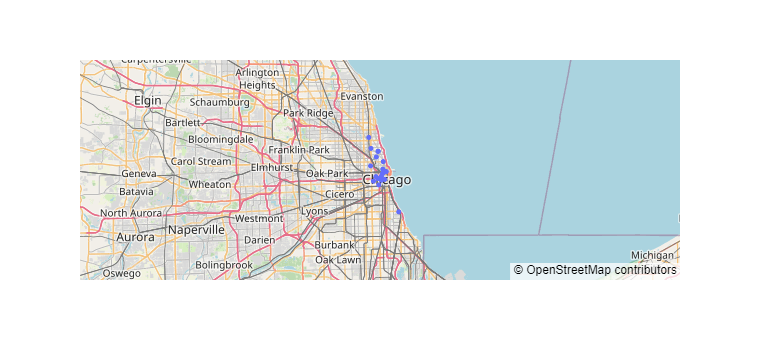

In [85]:

#fig = px.scatter_geo(lat=df['latitude_start'].head(20), lon=df['longitude_start'].head(20))
fig = px.scatter_mapbox(lat=df['latitude_start'].head(20), lon=df['longitude_start'].head(20))
fig.update_layout(mapbox_style="open-street-map")
fig.show()
# need to split data up by time, as the dataframe is too big for the JS code behind the map